PENGEMBANGAN SISTEM DETEKSI CYBERBULLYING DI MEDIA SOSIAL MENGGUNAKAN METODE PEMBELAJARAN MESIN DAN ENSEMBLE LEARNING

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== LOAD DATASET ===
   No.                                           Komentar      Kategori
0    1        "Kaka tidur yaa, udah pagi, gaboleh capek2"  Non-bullying
1    2            "makan nasi padang aja begini badannya"  Non-bullying
2    3  "yang aku suka dari dia adalah selalu cukur je...      Bullying
3    4  "Hai kak Isyana aku ngefans banget sama kak Is...  Non-bullying
4    5  "Manusia apa bidadari sih herann deh cantik te...  Non-bullying

=== PEMILIHAN ATRIBUT ===
                                            Komentar      Kategori
0        "Kaka tidur yaa, udah pagi, gaboleh capek2"  Non-bullying
1            "makan nasi padang aja begini badannya"  Non-bullying
2  "yang aku suka dari dia adalah selalu cukur je...      Bullying
3  "Hai kak Isyana aku ngefans banget sama kak Is...  Non-bullying
4  "Manusia apa bidadari sih herann deh cantik te...  Non-bullying

=== DATASET AFTER REMOVING STOPWORDS ===
                                            Komentar  \
0        "Kaka tidur

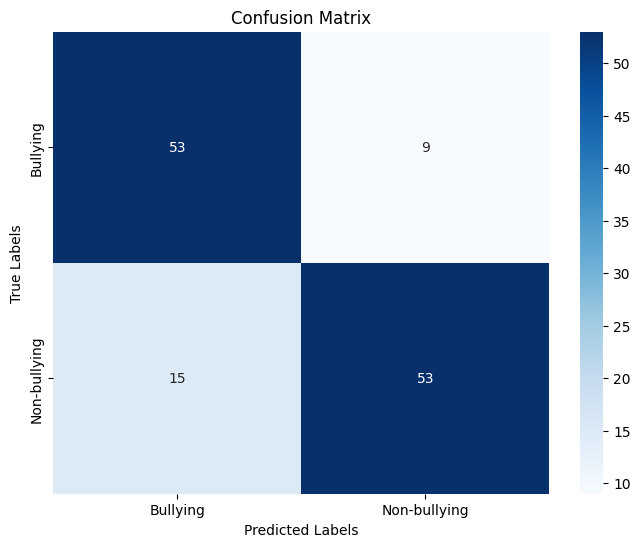

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
2025-01-05 11:15:57.176 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare

In [9]:

import streamlit as st
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re


# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))  # Change to 'english' for English datasets

# Load dataset
file_path = 'test.xlsx'
data = pd.read_excel(file_path)
print("=== LOAD DATASET ===")
print(data.head())

# Pemilihan atribut
data_selected = data[['Komentar', 'Kategori']]
print("\n=== PEMILIHAN ATRIBUT ===")
print(data_selected.head())

# Remove stopwords from the "Komentar" column
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure the input is a string
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    return text

data_selected['Komentar_cleaned'] = data_selected['Komentar'].apply(remove_stopwords)

print("\n=== DATASET AFTER REMOVING STOPWORDS ===")
print(data_selected[['Komentar', 'Komentar_cleaned', 'Kategori']].head())

# Encoding data nominal (kategori ke numerik)
label_encoder = LabelEncoder()
data_selected['Kategori_encoded'] = label_encoder.fit_transform(data_selected['Kategori'])
print("\n=== ENCODING DATA NOMINAL ===")
print(data_selected[['Komentar_cleaned', 'Kategori', 'Kategori_encoded']].head())

# Split dataset menjadi data latih dan data uji (80% latih, 20% uji)
X = data_selected['Komentar_cleaned']  # Fitur (input)
y = data_selected['Kategori_encoded']  # Label (output)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n=== SPLIT DATASET ===")
print("Data latih:")
print(X_train.head())
print("Label latih:")
print(y_train.head())
print("Data uji:")
print(X_test.head())
print("Label uji:")
print(y_test.head())

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Multinomial Naive Bayes model
model = MultinomialNB(alpha=1.0)  # Default alpha for smoothing
model.fit(X_train_vec, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_vec)

# Print modeling details
print("\n=== MODELING DETAILS ===")
print("Model: Multinomial Naive Bayes")
print(f"Hyperparameters: alpha={model.alpha}")
print("Vectorization: TF-IDF with max_features=5000")
print("Training Dataset Size:", X_train.shape[0])
print("Test Dataset Size:", X_test.shape[0])

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\n=== MODEL EVALUATION ===")
print(f"Accuracy: {accuracy:.4f}")

# Classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:\n", class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



# Load data
data_path = 'test.xlsx'  # Replace with your dataset path
data = pd.read_excel(data_path)

# Data preprocessing
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.split()
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stop words
    return ' '.join(text)

data['Cleaned_Comment'] = data['Komentar'].apply(clean_text)

X = data['Cleaned_Comment']
y = data['Kategori']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

# Train Naive Bayes model
model = MultinomialNB(alpha=0.5)  # Adjusted alpha for smoothing
model.fit(X_train_smote, y_train_smote)

# Evaluate model
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

# Streamlit app
st.title("Pendeteksi Komentar Mengandung CyberBullying")

st.write("Web ini mendeteksi komentar atau text yang mengandung unsur cyberbullying")

# Input for user comment
user_input = st.text_area("Masukkan komentar atau Text:")

if st.button("Classify"):
    if user_input.strip():
        cleaned_input = clean_text(user_input)
        user_input_vec = vectorizer.transform([cleaned_input])
        prediction = model.predict(user_input_vec)[0]
        st.write(f"The comment is classified as: **{prediction}**")
    else:
        st.write("Please enter a valid comment.")

# Show model accuracy
st.write("Model Accuracy:", accuracy)

